## Content

- Perceptron

In [1]:
# Loading libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Perceptron 

- __Conceptual Basis__

    - Perceptron models are basically like binary classifiers. The result is either class A or class B based on the following LinReg function. But, the classes are not given probability or permitted gradient. Instead of the 0 or 1 values of the LinReg, take the sigmoid function for non-binary values betweem 0 and 1. 
    - Linear Regression formula below. The key aspect was to reduce/minimize the squared error. 
$$ y = \alpha + \beta X $$

    - In the perceptrons, the $\alpha$ is the __shift__ which tries to regularize the boundary to zero. And, $\beta$ is the __weight__ which controls the influence of each variable in a linear fashion. 
    
    - How to minimize the errors in Perceptron models? -- the cost is to minimize the sum of the output of our functional form from all misclassified examples. 
    - Create a boundary with errors (think of SVM). 
    - Take the absolute value of the misclassified observations and sum them together for our cost. 
    - Based on the cost fucntion all boundaries that correctly divide all data points into classes with no errors will have the same cost: zero. Once every datapoint is classified so the cost is zero, the perceptron algorithm stops, unliess it keeps trying to find a good classifier.
    - The most common curve for the function is the _logistic function_ or _sigmoid curve_. The formula is   
$$ \frac{1}{1+e^{-x}} $$
    - Why? because continuous outcomes allow more subtlety in the perceptrons and in the NNs. 
    - And, just as a decision tree in itself is not a good model, but boosting and Random Forest give powerful models, Neural networks help create powerful models from perceptrons. 

In [34]:
# Perceptrons in practice 

test_data = pd.DataFrame()

test_data['test'] = [90, 100, 85, 93, 88, 100, 97, 92, 89, 84,
                     55, 65, 75, 58, 69, 71, 72, 63, 70, 59]
test_data['project'] = [100, 85, 98, 88, 87, 99, 99, 86, 89, 100,
                        67, 71, 74, 73, 55, 59, 56, 72, 67, 72]
test_data['pass'] = ['pass', 'pass', 'pass', 'pass', 'pass',
                     'pass', 'pass', 'pass', 'pass', 'pass',
                     'fail', 'fail', 'fail', 'fail', 'fail',
                     'fail', 'fail', 'fail', 'fail', 'fail']

In [35]:
test_data.head()

,test,project,pass
0,90,100,pass
1,100,85,pass
2,85,98,pass
3,93,88,pass
4,88,87,pass


In [36]:
# Import Perceptron.
from sklearn.linear_model import Perceptron

# Establish X and Y.
X = test_data[['test', 'project']]
Y = test_data['pass']

# Establish Perceptron Model.
# 10,000 iterations to ensure accuracy since data is non-normalized.
perceptron = Perceptron(n_iter=10000)

# Fit Perceptron.
perceptron.fit(X, Y)

# Get Parameters.
print('Score: ' + str(perceptron.score(X, Y)))

Score: 1.0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:130: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [37]:
# Show perceptron borders 

# Establish a mesh for our plot 
x_min, x_max = X.test.min() - 1, X.test.max() + 3
y_min, y_max = X.project.min() - 1, X.test.max() + 3

xx, yy = np.meshgrid(np.arange(x_min, x_max, .1), 
                    np.arange(y_min, y_max, .1))

# Predict over the mesh.
Z = (perceptron.predict(np.c_[xx.ravel(), yy.ravel()])=='pass')

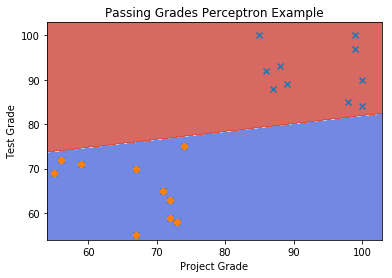

In [38]:
# Reshape the pred
Z = Z.reshape(xx.shape)

# Plot the mesh. 
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=.8)

#Plot our two scatters. 
plt.scatter(test_data.project[0:20], test_data.test[0:20], marker='x')
plt.scatter(test_data.project[10:20], test_data.test[10:20], marker='o')

# Aesthetics.
#plt.xlim(x_min, x_max)
#plt.ylim(y_min, y_max)
plt.xlabel('Project Grade')
plt.ylabel('Test Grade')
plt.title('Passing Grades Perceptron Example')
plt.show()

## What is a neural net? 

- Layers of perceptrons built on top of each other. Only the first layer is visible, the rest of the layers are hidden. 

## Supervised Neural Nets 

- With multiple features to feed into the model, each feature will go through a set of perceptron models to arrive at a response which will be trained to our output. 

- This can be used both as a regression or a classification model. 




In [81]:
#https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artworks.csv

In [82]:
artworks = pd.read_csv('https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artworks.csv')

In [83]:
artworks.head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,...,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,...,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,http://www.moma.org/media/W1siZiIsIjk4Il0sWyJw...,NaN,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,Photographic reproduction with colored synthet...,...,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsi...,NaN,NaN,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,http://www.moma.org/media/W1siZiIsIjEyNiJdLFsi...,NaN,NaN,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN


In [46]:
#artworks.Artist.value_counts() 

In [84]:
artworks.columns

Index(['Title', 'Artist', 'ConstituentID', 'ArtistBio', 'Nationality',
       'BeginDate', 'EndDate', 'Gender', 'Date', 'Medium', 'Dimensions',
       'CreditLine', 'AccessionNumber', 'Classification', 'Department',
       'DateAcquired', 'Cataloged', 'ObjectID', 'URL', 'ThumbnailURL',
       'Circumference (cm)', 'Depth (cm)', 'Diameter (cm)', 'Height (cm)',
       'Length (cm)', 'Weight (kg)', 'Width (cm)', 'Seat Height (cm)',
       'Duration (sec.)'],
      dtype='object')

In [85]:
# Select columns 

artworks = artworks[['Artist', 'Nationality', 'Gender', 'Date', 'Department',
                    'DateAcquired', 'URL', 'ThumbnailURL', 'Height (cm)', 'Width (cm)']]


In [86]:
artworks.shape

(135804, 10)

In [87]:
artworks.URL.isnull().sum()

57684

In [88]:
# Convert URLs to Booleans. 

artworks['URL'] = artworks.URL.notnull() # If value, returns True, NaN/null False, inverse of isna() 
artworks['ThumbnailURL'] = artworks.ThumbnailURL.notnull()

In [89]:
# Drop films and some other tricky row. 

print(artworks.Department.unique())

artworks = artworks[artworks.Department != 'Film']
artworks = artworks[artworks.Department != 'Media and Performance']
artworks = artworks[artworks.Department != 'Flusus Collection']

['Architecture & Design' 'Prints & Illustrated Books' 'Drawings'
 'Painting & Sculpture' 'Photography' 'Media and Performance Art' 'Film'
 'Architecture & Design - Image Archive' 'Fluxus Collection']


In [90]:
# Drop missing values 

artworks = artworks.dropna()

artworks.shape # 107288, 10

artworks.head()

,Artist,Nationality,Gender,Date,Department,DateAcquired,URL,ThumbnailURL,Height (cm),Width (cm)
0,Otto Wagner,(Austrian),(Male),1896,Architecture & Design,1996-04-09,True,True,48.6000,168.9000
1,Christian de Portzamparc,(French),(Male),1987,Architecture & Design,1995-01-17,True,True,40.6401,29.8451
2,Emil Hoppe,(Austrian),(Male),1903,Architecture & Design,1997-01-15,True,True,34.3000,31.8000
3,Bernard Tschumi,(),(Male),1980,Architecture & Design,1995-01-17,True,True,50.8000,50.8000
4,Emil Hoppe,(Austrian),(Male),1903,Architecture & Design,1997-01-15,True,True,38.4000,19.1000


In [91]:
# Classifying the Department from MLP

# But first, data preprocessing! 

artworks.dtypes

# Let's change the DateAcquired column to datetime
artworks['DateAcquired'] = pd.to_datetime(artworks.DateAcquired)
artworks['YearAcquired'] = artworks.DateAcquired.dt.year

In [93]:
#artworks.YearAcquired.dtype

In [104]:
# Gender has many multiple values for multiple artists
artworks.loc[artworks['Gender'].str.contains('\) \('), 'Gender'] = '\(multiple_persons\)'
artworks.loc[artworks['Nationality'].str.contains('\) \('), 'Nationality'] = '\(multiple_nationalities\)'
artworks.loc[artworks['Artist'].str.contains(','), 'Artist'] = 'Multiple_Artists'

In [105]:
# Convert dates to start date, cutting down number of distinct examples.
artworks['Date'] = pd.Series(artworks.Date.str.extract(
    '([0-9]{4})', expand=False))[:-1]


(Male)                  82567
(Female)                14257
\(multiple_persons\)     5515
()                       4937
(male)                     12
Name: Gender, dtype: int64

In [103]:
artworks.Nationality.unique()

array(['(Austrian)', '(French)', '()', '(American)', '(German)',
       '\\(multiple_nationalities\\)', '(Swedish)', '(British)',
       '(Japanese)', '(Italian)', '(Argentine)', '(Swiss)', '(Brazilian)',
       '(Luxembourgish)', '(Spanish)', '(Dutch)', '(Russian)',
       '(Iranian)', '(Finnish)', '(Nationality unknown)', '(Danish)',
       '(Moroccan)', '(Coptic)', '(Persian)', '(Colombian)',
       '(Australian)', '(Hungarian)', '(Belgian)', '(Canadian)',
       '(Slovenian)', '(Chilean)', '(Mexican)', '(Yugoslav)', '(Latvian)',
       '(Nationality Unknown)', '(Polish)', '(Czech)', '(Israeli)',
       '(Czechoslovakian)', '(Croatian)', '(Norwegian)', '(Cuban)',
       '(Romanian)', '(Venezuelan)', '(Uruguayan)', '(Greek)',
       '(Ukrainian)', '(Various)', '(Thai)', '(Algerian)', '(Icelandic)',
       '(Guatemalan)', '(Indian)', '(Chinese)', '(Irish)',
       '(Costa Rican)', '(Korean)', '(Ethiopian)', '(Kuwaiti)',
       '(Haitian)', '(Scottish)', '(South African)', '(Zimbabwean

In [106]:
# Convert dates to start date, cutting down number of distinct examples.
artworks['Date'] = pd.Series(artworks.Date.str.extract(
    '([0-9]{4})', expand=False))[:-1]


In [108]:
artworks.head()

,Artist,Nationality,Gender,Date,Department,DateAcquired,URL,ThumbnailURL,Height (cm),Width (cm),YearAcquired
0,Otto Wagner,(Austrian),(Male),1896,Architecture & Design,1996-04-09,True,True,48.6000,168.9000,1996
1,Christian de Portzamparc,(French),(Male),1987,Architecture & Design,1995-01-17,True,True,40.6401,29.8451,1995
2,Emil Hoppe,(Austrian),(Male),1903,Architecture & Design,1997-01-15,True,True,34.3000,31.8000,1997
3,Bernard Tschumi,(),(Male),1980,Architecture & Design,1995-01-17,True,True,50.8000,50.8000,1995
4,Emil Hoppe,(Austrian),(Male),1903,Architecture & Design,1997-01-15,True,True,38.4000,19.1000,1997


In [107]:
# Final column drops and NA drop.
X = artworks.drop(['Department', 'DateAcquired', 'Artist', 'Nationality', 'Date'], 1)

# Create dummies separately.
artists = pd.get_dummies(artworks.Artist)
nationalities = pd.get_dummies(artworks.Nationality)
dates = pd.get_dummies(artworks.Date)

# Concat with other variables, but artists slows this wayyyyy down so we'll keep it out for now
X = pd.get_dummies(X, sparse=True)
X = pd.concat([X, nationalities, dates], axis=1)

Y = artworks.Department

In [111]:
# Neural networks are hugely computationally intensive.
# This may take several minutes to run.

# Import the model.
from sklearn.neural_network import MLPClassifier

# Establish and fit the model, with a single, 1000 perceptron layer.
mlp = MLPClassifier(hidden_layer_sizes=(10,))
mlp.fit(X, Y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [112]:
mlp.score(X,Y)

0.6484508985161435

In [115]:
Y.value_counts()/len(Y)

Prints & Illustrated Books    0.514661
Photography                   0.225067
Architecture & Design         0.112864
Drawings                      0.102379
Painting & Sculpture          0.033312
Fluxus Collection             0.007848
Media and Performance Art     0.003868
Name: Department, dtype: float64

In [117]:
from sklearn.model_selection import cross_val_score
cross_val_score(mlp, X, Y, cv=5)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([0.58909599, 0.64249767, 0.50295941, 0.54471734, 0.48326652])

In [118]:
mlp = MLPClassifier(hidden_layer_sizes=(100,4))

In [119]:
%timeit mlp.fit(X, Y) #57.5 s ± 4.26 s per loop (mean ± std. dev. of 7 runs, 1 loop each)



57.5 s ± 4.26 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
